# Final Project Submission

- Student name: Keith Byron Otuomagie
- Student pace: self paced
- Scheduled projedct review date/time: Thursday, March 6th, 2025 / 2:00 PM (EST)
- Instructor name: Mark Barbour
- Blog post URL: https://medium.com/@otuomagie/general-steps-for-machine-learning-and-regression-0b671501613a

# Business Problem

SyriaTel is a telecommunications company.  The enterprise is interested in retaining more customers due to the loss of revenue.
SyriaTel wants to understand the following:

- Can customer attrition be predicted?
- Are there any client characteristics that can identify customer attrition? 

# Data Understanding

The data for examing the aforementioned problem comes from the following source: [Churn in Telecom's dataset](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset).

Before beginning to identify any trends with customers that churn, I want to examine and become familiar with the dataset.  I will conduct exploratory data analysis in order to understand the dataset attributes, which includes, but not limited to the following:

1. Number of Columns
2. Number of Rows
3. Column Names
4. Format of the data in each column

In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from itertools import combinations

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression, Ridge
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [2]:
# Reading file

df = pd.read_csv("syria_tel.csv")

In [3]:
# Examining first 20 columns

df.head(20)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [4]:
# Examining last 20 columns

df.tail(20)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3313,ID,127,408,392-5090,no,no,0,102.8,128,17.48,...,95,12.21,191.4,97,8.61,10.0,5,2.70,1,False
3314,MO,89,415,373-7713,no,no,0,178.7,81,30.38,...,74,19.86,131.9,120,5.94,9.1,4,2.46,1,False
3315,ME,149,415,392-1376,no,yes,18,148.5,106,25.25,...,106,9.73,178.3,98,8.02,6.5,4,1.76,0,False
3316,MS,103,510,390-6388,no,yes,29,164.1,111,27.90,...,96,18.62,220.3,108,9.91,12.3,9,3.32,0,False
3317,SD,163,415,379-7290,yes,no,0,197.2,90,33.52,...,113,16.02,211.1,94,9.50,7.8,8,2.11,1,False
3318,OK,52,415,397-9928,no,no,0,124.9,131,21.23,...,118,25.54,192.5,106,8.66,11.6,4,3.13,2,False
3319,WY,89,415,378-6924,no,no,0,115.4,99,19.62,...,115,17.84,280.9,112,12.64,15.9,6,4.29,3,False
3320,GA,122,510,411-5677,yes,no,0,140.0,101,23.80,...,77,16.69,120.1,133,5.40,9.7,4,2.62,4,True
3321,VT,60,415,400-2738,no,no,0,193.9,118,32.96,...,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
3322,MD,62,408,409-1856,no,no,0,321.1,105,54.59,...,122,22.57,180.5,72,8.12,11.5,2,3.11,4,True


In [5]:
# Getting column info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

**Observations | Columns**

The dataset has a total of 21 columns.  The following variables, or the four columns - *State*, *Phone Number*, *International Plan*, and *Voice Mail Plan* - are in string format.  My immediate intuition is that these values require One-Hot Encoding.

In [6]:
# Getting description info

df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
# Number of Unique Values for State

df['state'].nunique()

51

In [8]:
# Number of Value Counts for State 

df['state'].value_counts()

WV    106
MN     84
NY     83
AL     80
OH     78
OR     78
WI     78
WY     77
VA     77
CT     74
VT     73
MI     73
ID     73
UT     72
TX     72
IN     71
MD     70
KS     70
NJ     68
MT     68
NC     68
NV     66
WA     66
CO     66
MS     65
RI     65
MA     65
AZ     64
MO     63
FL     63
NM     62
ND     62
ME     62
DE     61
NE     61
OK     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

## Observations | Number of States

Based on the following code - *df['state'].nunique()* - there are a total of 51 states.  That is not true since there are 50 states in the United States of America.

However, upon reviewing the output of the following code - *df['state'].value_counts()* - I see that the District of Columbia is being counted as a state.  There are 54 observations for the District of Columbia.


In [9]:
# Value Counts of the Churn Variable

df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

## Observations | Number of Values within the *Churn* Column

Based on the following code - *df['churn'].value_counts()* - there are are more *True* observations than *False*.  If I proceed with using a train-test split later, an idea is to use SMOTE in order to create more *True* observations within the Training data.

In [10]:
# Checking for total of missing values in each column

df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [11]:
# Checking for duplicates

df.duplicated().sum()

0

## Observations | Missing Values

Based on the following code - *df.isnull().sum()* - there is no missing data in any of the 21 columns.  

Based on the following code - *df.duplicated().sum()* - there are no duplicate rows in the dataset.

I would state that the dataset is *clean* in both aspects.

# Data Preparation

Before performing any modeling, I want to prepare the dataset.  As stated prior, the dataset is *clean* in respect to missing data.  There is no missing data based on the following code - - *df.isnull().sum()*.  As a result, I do not need to consider any data cleaning strategies such as the following: 1) eliminating rows of data, 2) replacing missing values with another value such as a median, or 3) simply maintaining the missing rows of data in its current format.

There is no duplicate rows of data based on the following code - *df.duplicated().sum()*.

However, I want to remove a few columns before proceeding to perform any modeling.

## Removing *State* Column

During the *Data Understanding* stage, my immediate intuition was to use One-Hot Encoding on this column since it is categorical data.  However, there are a total of 51 unique values in this column.

Upon further contemplation, I am deciding to remove the *state* column.  The business problem is to find and understand any patterns that lead to customer churn.  I do not believe the geographical location of a custom will provide any insight to customer churn.

In [12]:
# Removing 'state' column

df = df.drop("state", axis=1)

In [13]:
# Checking whether or not the 'state' column was removed

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   phone number            3333 non-null   object 
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

In [14]:
# Checking whether or not the 'state' column was removed

df.head(10)

,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,118,510,391-8027,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,121,510,355-9993,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,147,415,329-9001,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,117,408,335-4719,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,141,415,330-8173,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


## Removing *Voice Mail Plan* Column 

During the *Data Understanding* stage, my immediate intuition was to also use One-Hot Encoding on this column since it is categorical data.

Upon further contemplation, I am deciding to remove the *voice mail plan* column. 

When I examined the dataset during the *Data Understanding* stage, I noticed that when there was a *no* in the *voice mail plan* column, there were no corresponding messages in the *number vmail messages* column.

This observation has rationale.  If a customer does not have a voice mail plan, then the respective customer will not have voicemail messages.  If a customer has a voicemail plan, then the customer may have voicemail messages.

In [15]:
# Removing 'voice mail plan' column

df = df.drop("voice mail plan", axis=1)

In [16]:
# Checking whether or not the 'voice mail plan' column was removed

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   phone number            3333 non-null   object 
 3   international plan      3333 non-null   object 
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total day charge        3333 non-null   float64
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total eve charge        3333 non-null   float64
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total night charge      3333 non-null   float64
 14  total intl minutes      3333 non-null   

In [17]:
# Checking whether or not the 'voice mail plan' column was removed

df.head(10)

,account length,area code,phone number,international plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,382-4657,no,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,371-7191,no,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,358-1921,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,375-9999,yes,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,330-6626,yes,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,118,510,391-8027,yes,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,121,510,355-9993,no,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,147,415,329-9001,yes,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,117,408,335-4719,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,141,415,330-8173,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


## Removing *Phone Number* Column

During the *Data Understanding* stage, my immediate intuition was to also use One-Hot Encoding on this column since it is in string format.  Phone number is not categorical data since every person has a unique phone number.  However, area code is not unique among individuals.  Area code provides information regarding locality within a state.

Upon further contemplation, I am deciding to remove the *phone number* column.  The business problem is to find and understand any patterns that lead to customer churn.  I do not believe the geographical location of a customer will provide any insight to customer churn.

In [18]:
# Removing 'phone number' column

df = df.drop("phone number", axis=1)

In [19]:
# Checking whether or not the 'phone number' column was removed

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   international plan      3333 non-null   object 
 3   number vmail messages   3333 non-null   int64  
 4   total day minutes       3333 non-null   float64
 5   total day calls         3333 non-null   int64  
 6   total day charge        3333 non-null   float64
 7   total eve minutes       3333 non-null   float64
 8   total eve calls         3333 non-null   int64  
 9   total eve charge        3333 non-null   float64
 10  total night minutes     3333 non-null   float64
 11  total night calls       3333 non-null   int64  
 12  total night charge      3333 non-null   float64
 13  total intl minutes      3333 non-null   float64
 14  total intl calls        3333 non-null   

In [20]:
# Checking whether or not the 'phone number' column was removed

df.head(10)

,account length,area code,international plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,no,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,no,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,yes,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,yes,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,118,510,yes,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,121,510,no,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,147,415,yes,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,117,408,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,141,415,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


## Maintain *International Plan* column

During the Data Understanding stage, my immediate intuition was to use One-Hot Encoding on this column since it is categorical data.

When I examined the dataset during the *Data Understanding* stage, I noticed that the *international plan* contradicts the *voice mail plan* column.

Regarding the *voice mail plan* column, a customer can have a *no*.  As a result, there were no corresponding messages in the *number vmail messages* column for the same customer.

This is not the case for the column, *international plan*.  There can be a *no* in the *international plan* column for a customer.  However, there can still be corresponding numerical entries for the following columns - *total intl minutes*, *total intl calls*, and *total intl charge*.

I will maintain the *international plan* column in the dataset.  Furthermore, I will utilize one-hot encoding during the modeling phase.

# Modeling

## Logistic Regression Model

I will proceed with creating a logistic regression model instead of a linear regression model to identify any trends associated with customer churn.  The target, or dependent variable, is whether or not a customer has discontinued using the Syria Telecom service.

A straight line, which is associated with a linear regression model, is not appropriate for capturing trends (if any) associated with customer churn.  As a result, a logistic regression model, which is associated with binary classification will be utilized.

### Baseline Logistic Regression Model

I will start the modeling process by creating a baseline logistic regression model.  Afterwards, I will determine whether or not I can improve the classifier by tuning the model performance.

In [21]:
# Identifying the X and Y variables, or splitting the data into Predictors and Target

X = df.drop("churn", axis=1)

y = df['churn']

In [22]:
# Creating dummy variables for the categorical variables in the X, or the Predictors

# Note: 'International Plan' is the only column with categorical data.  This is the only column that should undergo changes

X = pd.get_dummies(X, drop_first=True)

In [23]:
# Checking whether or not the dummy variable step is complete

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   number vmail messages   3333 non-null   int64  
 3   total day minutes       3333 non-null   float64
 4   total day calls         3333 non-null   int64  
 5   total day charge        3333 non-null   float64
 6   total eve minutes       3333 non-null   float64
 7   total eve calls         3333 non-null   int64  
 8   total eve charge        3333 non-null   float64
 9   total night minutes     3333 non-null   float64
 10  total night calls       3333 non-null   int64  
 11  total night charge      3333 non-null   float64
 12  total intl minutes      3333 non-null   float64
 13  total intl calls        3333 non-null   int64  
 14  total intl charge       3333 non-null   

In [24]:
# Checking whether or not the dummy variable step is complete

X.head()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,international plan_yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1


In [25]:
# Performing the Train-Test split (utilizing a random state = 42)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


I want to standardize the data for the Baseline Logistic Regression Model.  As a result, I am going to apply a Standard Scaler.

In [26]:
# Applying a Standard Scaler to X-train, and fitting the data

# Instatiating the Standard Scaler
scaler = StandardScaler()

# Fit and transform X_train
X_train_scaled = scaler.fit_transform(X_train)


In [27]:
# Creating the Baseline Logistic Regression Model

logreg_baseline = LogisticRegression()

model_log_baseline = logreg_baseline.fit(X_train_scaled, y_train)


In [28]:
# Generating Predictions for X-Train, or training data, with Baseline Logistic Regression Model

y_hat_train_baseline = logreg_baseline.predict(X_train_scaled)

In [29]:
# Calculating Baseline Logistic Regression Model metrics - precision, recall, accuracy, and F1 score - for training data

print('Baseline Training Precision: ', precision_score(y_train, y_hat_train_baseline))
print('Baseline Training Recall: ', recall_score(y_train, y_hat_train_baseline))
print('Baseline Training Accuracy: ', accuracy_score(y_train, y_hat_train_baseline))
print('Baseline Training F1-Score: ', f1_score(y_train, y_hat_train_baseline))

Baseline Training Precision:  0.5648854961832062
Baseline Training Recall:  0.20670391061452514
Baseline Training Accuracy:  0.8635454181672669
Baseline Training F1-Score:  0.30265848670756645


In [30]:
# Generating Predictions for X-Test, or test data, with Baseline Logistic Regression Model

# Transform X-test, or test data
X_test_scaled = scaler.transform(X_test)

# Now, utilize model to generate predictions for X-Test, or test
y_hat_test_baseline = logreg_baseline.predict(X_test_scaled)


In [31]:
# Calculating Baseline Logistic Regression Model metrics - precision, recall, accuracy, and F1 score - for training and test data

print('Baseline Training Precision: ', precision_score(y_train, y_hat_train_baseline))
print('Baseline Testing Precision: ', precision_score(y_test, y_hat_test_baseline))
print('\n\n')
print('Baseline Training Recall: ', recall_score(y_train, y_hat_train_baseline))
print('Baseline Testing Recall: ', recall_score(y_test, y_hat_test_baseline))
print('\n\n')
print('Baseline Training Accuracy: ', accuracy_score(y_train, y_hat_train_baseline))
print('Baseline Testing Accuracy: ', accuracy_score(y_test, y_hat_test_baseline))
print('\n\n')
print('Baseline Training F1-Score: ', f1_score(y_train, y_hat_train_baseline))
print('Baseline Testing F1-Score: ', f1_score(y_test, y_hat_test_baseline))

Baseline Training Precision:  0.5648854961832062
Baseline Testing Precision:  0.5609756097560976



Baseline Training Recall:  0.20670391061452514
Baseline Testing Recall:  0.184



Baseline Training Accuracy:  0.8635454181672669
Baseline Testing Accuracy:  0.8561151079136691



Baseline Training F1-Score:  0.30265848670756645
Baseline Testing F1-Score:  0.27710843373493976


Baseline Logistic Regression Model Confusion Matrix:
 [[691  18]
 [102  23]]


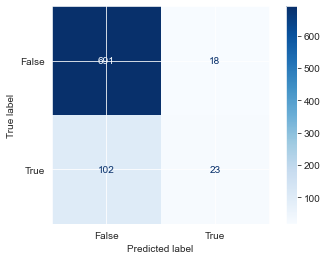

In [69]:
# Creating a confusion matrix for the Baseline Logistic Regression Model utilizing Test Data

cnf_matrix_test_baseline = confusion_matrix(y_test, y_hat_test_baseline)

print('Baseline Logistic Regression Model Confusion Matrix:\n', cnf_matrix_test_baseline)

disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_test_baseline, display_labels=model_log_baseline.classes_)

disp.plot(cmap=plt.cm.Blues)

AUC: 0.8268434414668547


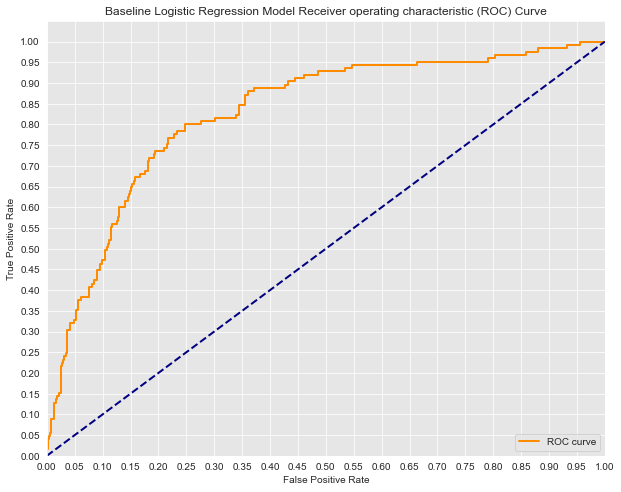

In [33]:
# Creating an ROC curve for the Baseline Logistic Regression Mode

y_score_baseline = logreg_baseline.fit(X_train_scaled, y_train).decision_function(X_test_scaled)

fpr_baseline, tpr_baseline, thresholds_baseline = roc_curve(y_test, y_score_baseline)

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr_baseline, tpr_baseline)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr_baseline, tpr_baseline, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Baseline Logistic Regression Model Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Baseline Logistic Regression Model | Conclusion

I have concluded creating a baseline logistic regression model.  

When the baseline model utilizes the training data, the evaluation metrics are the following:

- Precision: 56.5%
- Recall: 20.7%
- Accuracy: 86.4%
- F1 Score: 30.3%

When the baseline model utilizes the test data, the evaluation metrics are the following:

- Precision: 56.1%
- Recall: 18.4%
- Accuracy: 85.6%
- F1 Score: 27.7%

This is a strong start to understanding and identifying any trends with customer churn.  The evaluation metrics associated with the test data is close to the evaluation metrics associated with the training data.

However, the Area Under Curve (AUC) calculated for the test data baseline model is approximately 82.7%.  This is due to the number of false positives, or 102, calculated.  Improvement in any future logistic regression model could be associated with decreasing the number of false positives predicted, or increasing the number of true positives predicted. 


## Tuning the Baseline Logistic Regression Model

I want to tune the Baseline Logistic Regression Model in order to better predict whether or not a customer will churn.

I will attempt this by inversely adjusting the weights of the target in accordance with the (target) frequencies.  I will call this model the "Balanced Logistic Regression Model". 

In [34]:
# Creating the Balanced Logistic Regression Model

logreg_balance = LogisticRegression(class_weight='balanced')

model_log_balance = logreg_balance.fit(X_train_scaled, y_train)

In [35]:
# Generating Predictions for X-Train, or training data, wtih the Balanced Logistic Regression Model

y_hat_train_balance = logreg_balance.predict(X_train_scaled)

In [36]:
# Generating Predictions for X-Test, or test data, with the Balanced Logistic Regression Model

y_hat_test_balance = logreg_balance.predict(X_test_scaled)

In [63]:
# Calculating Balanced Logistic Regression Model metrics - precision, recall, accuracy, and F1 score - for training and test data

print('Balanced Training Precision: ', precision_score(y_train, y_hat_train_balance))
print('Balanced Testing Precision: ', precision_score(y_test, y_hat_test_balance))
print('\n\n')
print('Balanced Training Recall: ', recall_score(y_train, y_hat_train_balance))
print('Balanced Testing Recall: ', recall_score(y_test, y_hat_test_balance))
print('\n\n')
print('Balanced Training Accuracy: ', accuracy_score(y_train, y_hat_train_balance))
print('Balanced Testing Accuracy: ', accuracy_score(y_test, y_hat_test_balance))
print('\n\n')
print('Balanced Training F1-Score: ', f1_score(y_train, y_hat_train_balance))
print('Balanced Testing F1-Score: ', f1_score(y_test, y_hat_test_balance))

Balanced Training Precision:  0.35153129161118507
Balanced Testing Precision:  0.3745173745173745



Balanced Training Recall:  0.7374301675977654
Balanced Testing Recall:  0.776



Balanced Training Accuracy:  0.7675070028011205
Balanced Testing Accuracy:  0.7721822541966427



Balanced Training F1-Score:  0.47610459873760136
Balanced Testing F1-Score:  0.5052083333333334


Balanced Logistic Regression Model Confusion Matrix:
 [[547 162]
 [ 28  97]]


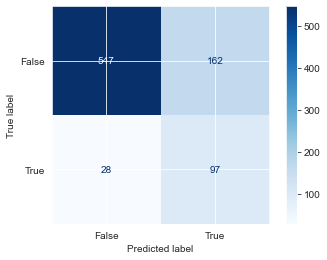

In [70]:
# Creating a confusion matrix for the Balanced Logistic Regression Model utilizing Test Data

cnf_matrix_test_balance = confusion_matrix(y_test, y_hat_test_balance)

print('Balanced Logistic Regression Model Confusion Matrix:\n', cnf_matrix_test_balance)

disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_test_balance, display_labels=model_log_balance.classes_)

disp.plot(cmap=plt.cm.Blues)

AUC: 0.8287390691114246


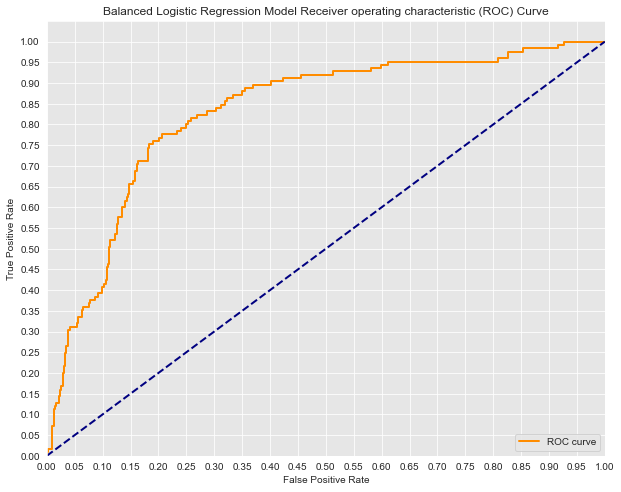

In [39]:
# Creating an ROC curve for the Balanced Logistic Regression Model

y_score_balance = logreg_balance.fit(X_train_scaled, y_train).decision_function(X_test_scaled)

fpr_balance, tpr_balance, thresholds_balance = roc_curve(y_test, y_score_balance)

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr_balance, tpr_balance)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr_balance, tpr_balance, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Balanced Logistic Regression Model Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Tuning the Baseline Logistic Regression Model | Conclusion

I have completed my initial pass in regards to turning the Baseline Logistic Regression Model.  Evaluation Metrics are below.

**Baseline Logistic Regression Model**

When the baseline model utilizes the training data, the evaluation metrics are the following:

- Precision: 56.5%
- Recall: 20.7%
- Accuracy: 86.4%
- F1 Score: 30.3%

When the baseline model utilizes the test data, the evaluation metrics are the following:

- Precision: 56.1%
- Recall: 18.4%
- Accuracy: 85.6%
- F1 Score: 27.7%

**Balanced Logistic Regression Model**

When the balanced model utilizes the training data, the evaluation metrics are the following:

- Precision: 35.2% 
- Recall: 73.7%
- Accuracy: 76.8%
- F1 Score: 47.6%

When the balanced model utilizes the test data, the evaluation metrics are the following:

- Precision: 37.5%
- Recall: 77.6%
- Accuracy: 77.2%
- F1 Score: 50.5%

**Other Observations**

I also want to highlight that the Area Under the Curve (AUC) for both models - the Baseline Logistic Regression Model, and the Balanced Logistic Regression Model - approximately the same.  The Baseline Logistic Regression Model has an AUC of 82.7%  The Balanced Logistic Regression Model has an AUC of 82.9%.

The Baseline Logistic Regression Model had more False Negatives - or 102 observations - in comparison to the Balanced Logistic Regression Model - or 28 observations.

The Baseline Logistic Regression Model has less False Positives - or 18 observations - in comparison to the Balanced Logistic Regression Model - or 162 observations.

I will proceed with utilizing the Baseline Logistic Regression Model since its Test Data Accuracy Score is higher than the Test Data Accuracy Score of the Balanced Logistic Regression Model.

## Further Tuning the Baseline Logistic Regression Model

I previously stated that I will proceed with utilizing the Baseline Logistic Regression Model.  I want to determine whether or not I can still tune this model.

I will attempt to tune the Baseline Logistic Regression Model by varying the regularization strength.

LogisticRegression(C=0.001)
AUC for 0.001: 0.8225444287729197
-------------------------------------------------------------------------------------
LogisticRegression(C=0.01)
AUC for 0.01: 0.8270916784203103
-------------------------------------------------------------------------------------
LogisticRegression(C=0.5)
AUC for 0.5: 0.8269111424541608
-------------------------------------------------------------------------------------
LogisticRegression(C=2)
AUC for 2: 0.8268434414668548
-------------------------------------------------------------------------------------
LogisticRegression(C=5)
AUC for 5: 0.8268095909732016
-------------------------------------------------------------------------------------
LogisticRegression(C=10)
AUC for 10: 0.8268208744710862
-------------------------------------------------------------------------------------
LogisticRegression(C=50)
AUC for 50: 0.8268095909732016
------------------------------------------------------------------------------------

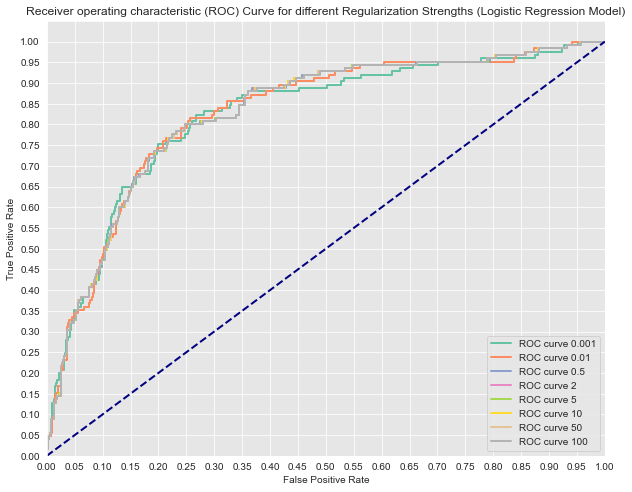

In [40]:
# Now let's compare a few different regularization performances on the dataset:

C_param_range = [0.001, 0.01, 0.5, 2, 5, 10, 50, 100]
names = [0.001, 0.01, 0.5, 2, 5, 10, 50, 100]
colors = sns.color_palette('Set2')

plt.figure(figsize=(10,8))

for n, c in enumerate(C_param_range):
    # Creating a new model to update regularization strength
    logreg_c = LogisticRegression(C=c)
    model_log_c = logreg_c.fit(X_train_scaled, y_train)
    print(model_log_c)

    # Generating predictions based on test data
    y_hat_test_c = logreg_c.predict(X_test_scaled)

    y_score_c = logreg_c.fit(X_train_scaled, y_train).decision_function(X_test_scaled)

    fpr_c, tpr_c, thresholds_c = roc_curve(y_test, y_score_c)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr_c, tpr_c)))
    print('-------------------------------------------------------------------------------------')
    lw = 2
    plt.plot(fpr_c, tpr_c, color=colors[n],
             lw=lw, label='ROC curve {}'.format(names[n]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for different Regularization Strengths (Logistic Regression Model)')
plt.legend(loc='lower right')
plt.show()

### Further Tuning the Baseline Logistic Regression Model  | Conclusion

I attempted to further tune the Baseline Logistic Regression Model.  I utilized the following regularization strengths - 0.001, 0.01, 0.5, 2, 5, 10, 50, 100.

The Area Under the Curves (AUCs) for the aforementioned regularization strengths were approximately 82.7%  The AUC for the Baseline Logistic Regression Model is approximately 82.7%

Based on the AUCs, there is no benefit to utilize any of the Logistic Regression Models with varying regularization strengths.

I will continue to proceed utilizing the Baseline Logistic Regression Model.

## Decision Tree

I have already created a Logistic Regression Model - the Baseline Logistic Regression Model - to predict whether or not a customer will churn.

I am going to explore a different model - a decision tree classifier - to determine whether or not I can predict customer churn.

### Baseline Decision Tree Model

I will start the modeling process by creating a baseline decision tree classifier.  I will create the model via ID3 (Iterative Dichotomiser 3).  

Afterwards, I will determine whether or not I can improve the classifier by tuning the model performance.

In [3]:
# Creating the classifier, and fitting it on the training data 

clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [42]:
# Making predictions with the training data via Baseline Decision Tree Classifier

y_hat_train_clf = clf.predict(X_train)

Unique aspect about creating a decision tree classifier is the ability to create a visual plot.  I will use the *plot_tree* function for the aforementioned action.

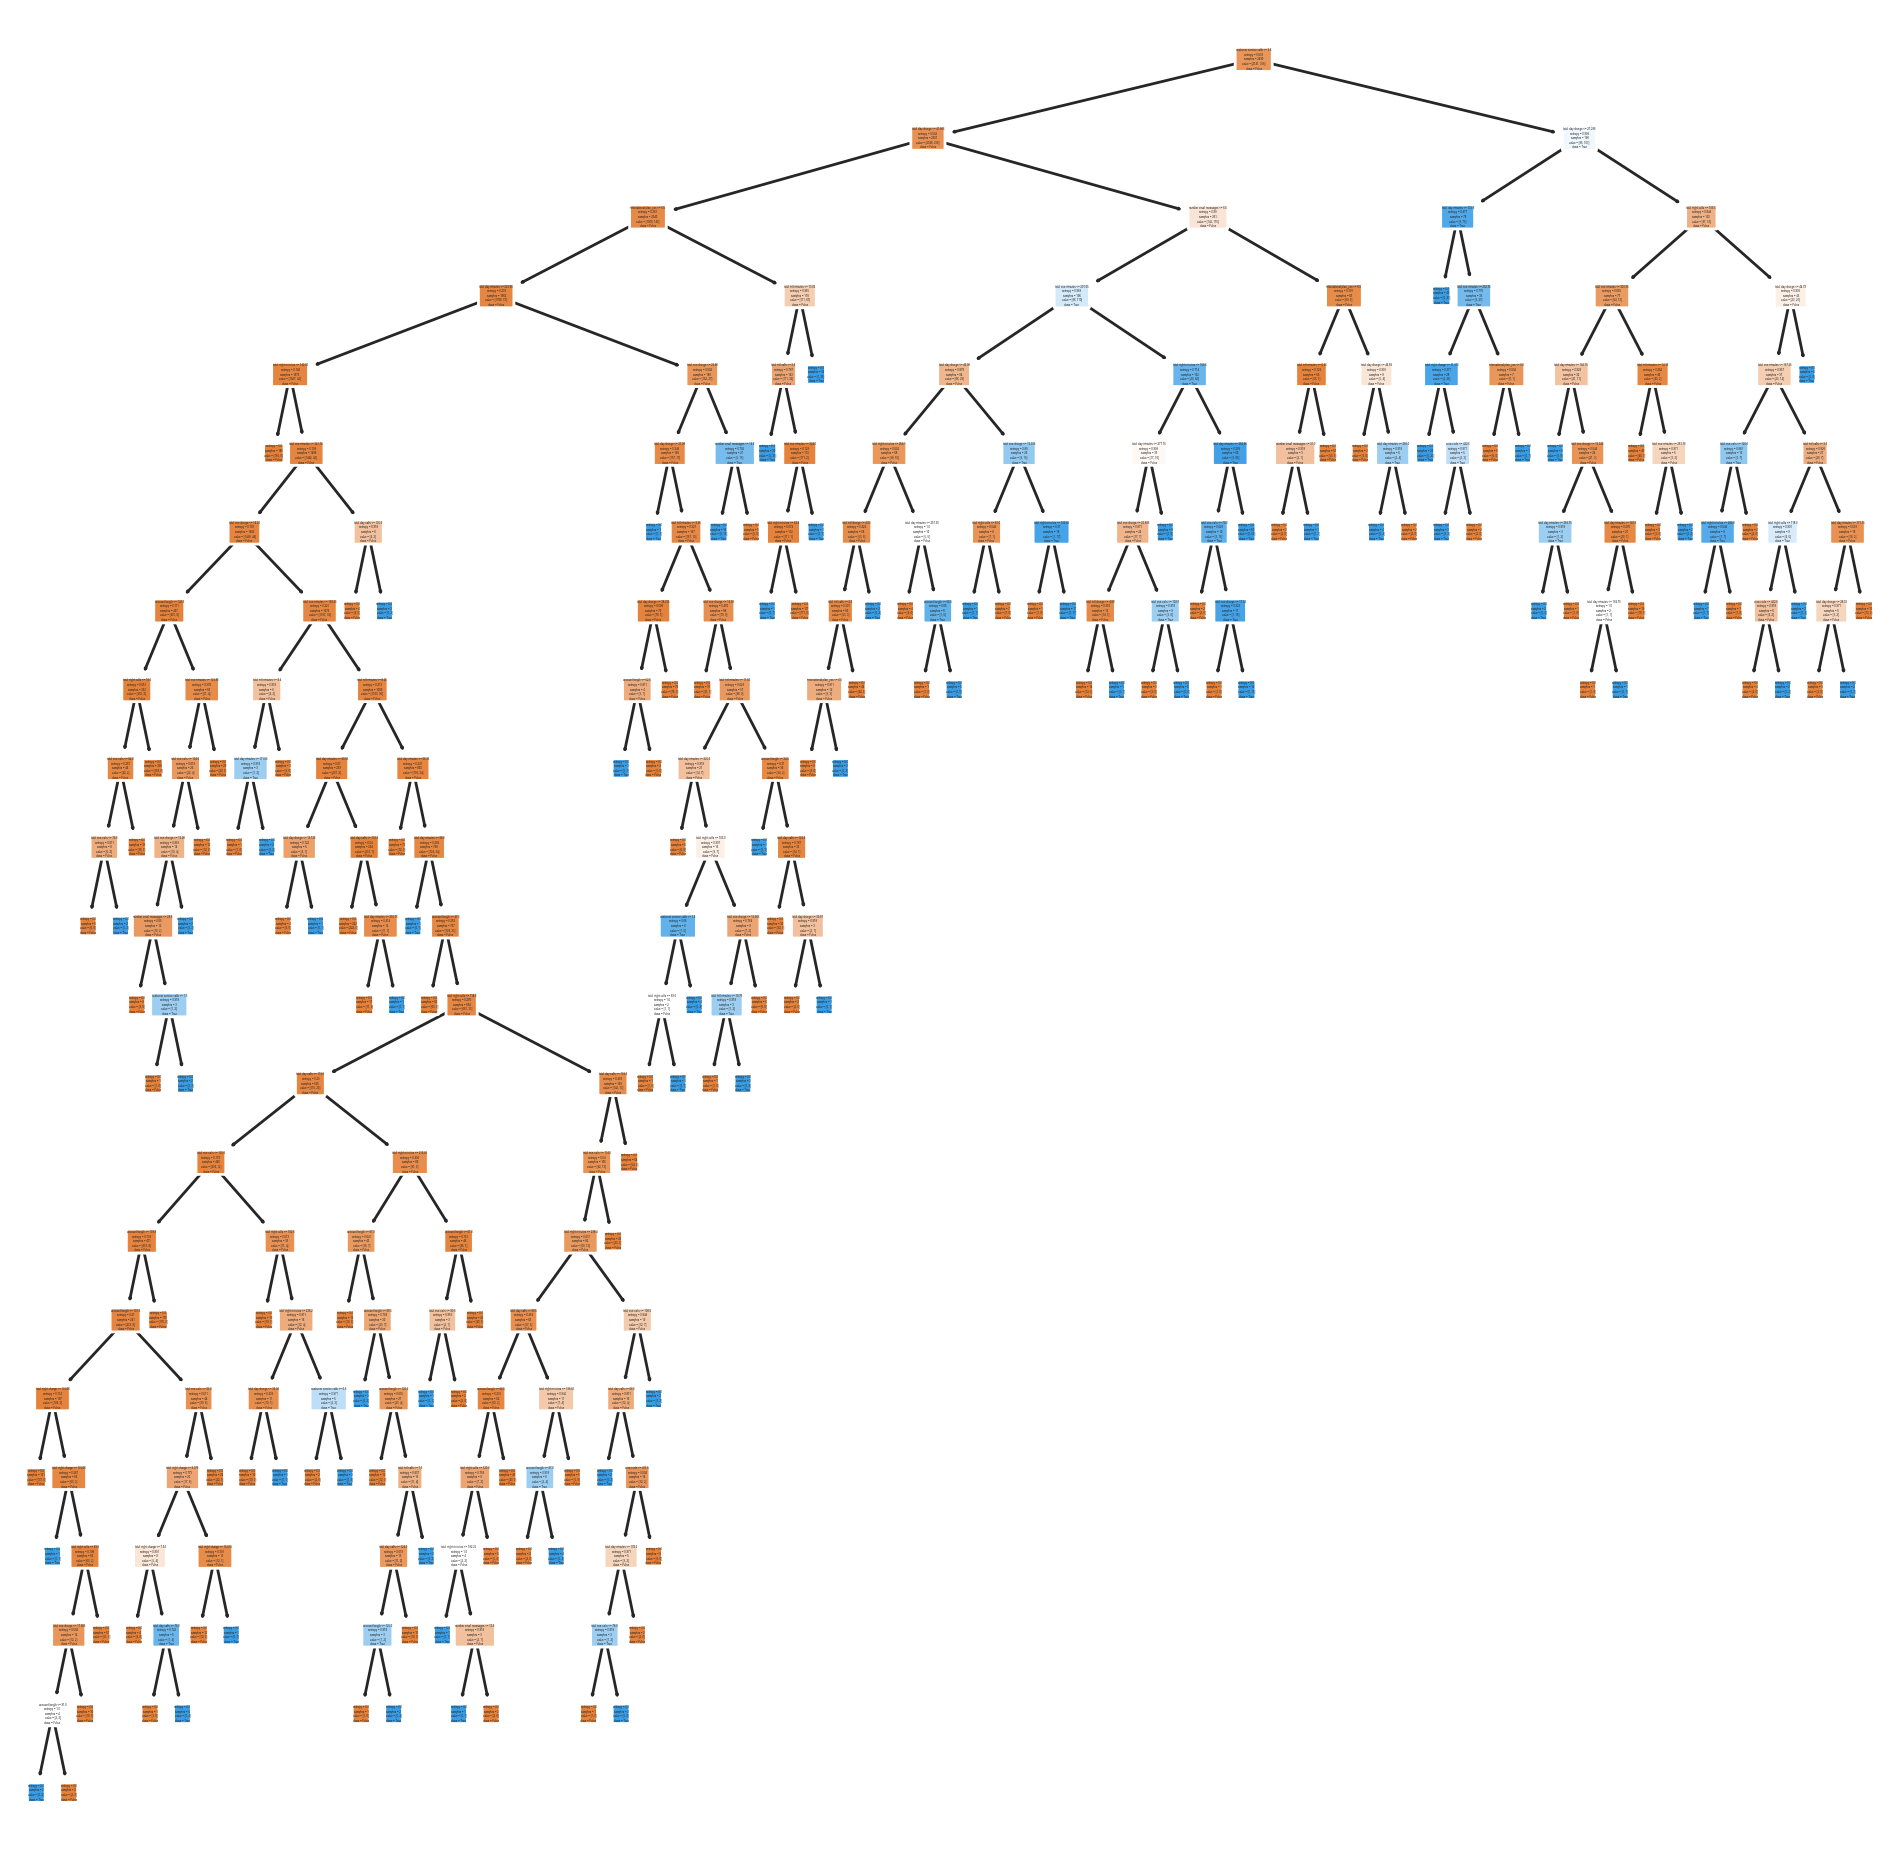

In [43]:
# Plot and show decision tree

plt.figure(figsize=(12,12), dpi=200)
tree.plot_tree(clf, 
               feature_names=X.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
plt.show()

Upon my first glance at the Baseline Decision Tree Model, my intuition is to prune the decision tree at a later time.  I can see there are multiple layers of depth to the Baseline Decision Tree Model that I am constructing.

In [44]:
# Generating Predictions for X-Test, or test data, via Baseline Decision Tree Classifier

y_hat_test_clf = clf.predict(X_test) 


In [45]:
# Calculating Baseline Decision Tree Model metrics - precision, recall, accuracy, and F1 score - for training and test data

print('Baseline Decision Tree Training Precision: ', precision_score(y_train, y_hat_train_clf))
print('Baseline Decision Tree Testing Precision: ', precision_score(y_test, y_hat_test_clf))
print('\n\n')
print('Baseline Decision Tree Training Recall: ', recall_score(y_train, y_hat_train_clf))
print('Baseline Decision Tree Testing Recall: ', recall_score(y_test, y_hat_test_clf))
print('\n\n')
print('Baseline Decision Tree Training Accuracy: ', accuracy_score(y_train, y_hat_train_clf))
print('Baseline Decision Tree Testing Accuracy: ', accuracy_score(y_test, y_hat_test_clf))
print('\n\n')
print('Baseline Decision Tree Training F1-Score: ', f1_score(y_train, y_hat_train_clf))
print('Baseline Decision Tree Testing F1-Score: ', f1_score(y_test, y_hat_test_clf))

Baseline Decision Tree Training Precision:  1.0
Baseline Decision Tree Testing Precision:  0.7131147540983607



Baseline Decision Tree Training Recall:  1.0
Baseline Decision Tree Testing Recall:  0.696



Baseline Decision Tree Training Accuracy:  1.0
Baseline Decision Tree Testing Accuracy:  0.9124700239808153



Baseline Decision Tree Training F1-Score:  1.0
Baseline Decision Tree Testing F1-Score:  0.7044534412955465


Baseline Decision Tree Model Confusion Matrix:
 [[674  35]
 [ 38  87]]


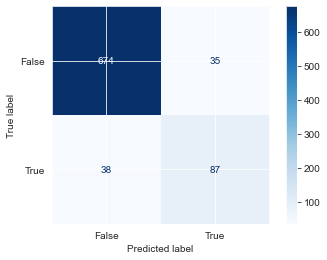

In [71]:
# Creating a confusion matrix for the Baseline Decision Tree Model utilizing Test Data

cnf_matrix_test_clf = confusion_matrix(y_test, y_hat_test_clf)

print('Baseline Decision Tree Model Confusion Matrix:\n', cnf_matrix_test_clf)

disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_test_clf, display_labels=clf.fit(X_train, y_train).classes_)

disp.plot(cmap=plt.cm.Blues)

AUC: 0.8197912552891397


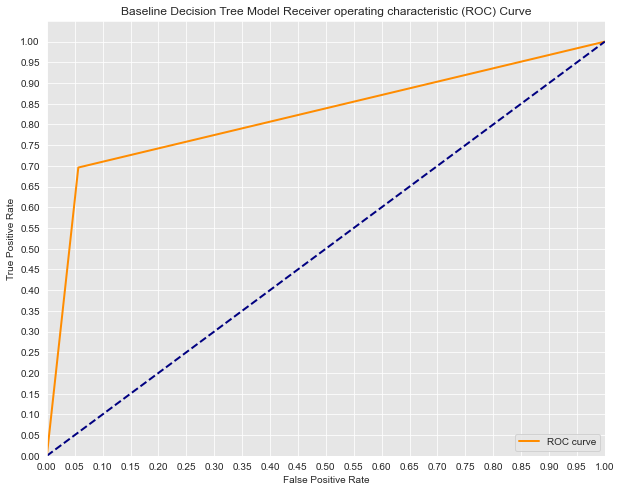

In [47]:
# Creating an ROC curve for Baseline Decision Tree Model

y_score_clf = clf.predict_proba(X_test)[:,1]

fpr_clf, tpr_clf, thresholds_clf = roc_curve(y_test, y_score_clf)

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr_clf, tpr_clf)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr_clf, tpr_clf, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Baseline Decision Tree Model Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Baseline Decision Tree Model | Conclusion

I have concluded creating a Baseline Decision Tree classifier.  

When the baseline model utilizes the training data, the evaluation metrics are the following:

- Precision: 100.0%
- Recall: 100.0%
- Accuracy: 100.0%
- F1 Score: 100.0%

When the baseline model utilizes the test data, the evaluation metrics are the following:

- Precision: 71.3%
- Recall: 69.6%
- Accuracy: 91.2%
- F1 Score: 70.4%

This model has overfitting due to the discrepancies in the training and test precision metrics, and the training and test recall metrics.

I am going to proceed to tune the decision tree classifier.

## Tuning the Decision Tree Model

- Maximum Tree Depth (*max_depth*) - depth of the decision tree, the maximum number of splits a decision tree can have before continue to grow
- Minimum Sample Split (*min_samples_split*) - minimum number of samples required to split an internal node
- Minimum Sample Leafs (*min_samples_leaf*) - minimum number of samples that a leaf node, or terminal node
- Maximum Features (*max_features*) - maximum number of features considered for making a split at a tree node

### Maximum Tree Depth

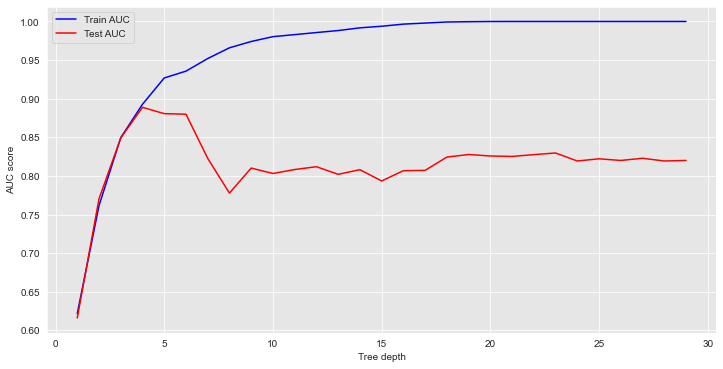

In [48]:
# Max_Depth - Identifying the ideal tree depth

max_depths = list(range(1, 30))
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    dt.fit(X_train, y_train)
    y_hat_train_dt = dt.predict_proba(X_train)[:, 1]
    fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_train, y_hat_train_dt)
    roc_auc_dt = auc(fpr_dt, tpr_dt)
    
    # Add auc score to previous train results
    train_results.append(roc_auc_dt)
    y_hat_test_dt = dt.predict_proba(X_test)[:, 1]
    fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_hat_test_dt)
    roc_auc_dt = auc(fpr_dt, tpr_dt)
    
    # Add auc score to previous test results
    test_results.append(roc_auc_dt)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

The optimal tree depth is 4.  After a tree depth of 4, the AUC scores for the train and test data begin to bifurcate.  

### Minimum Sample Split

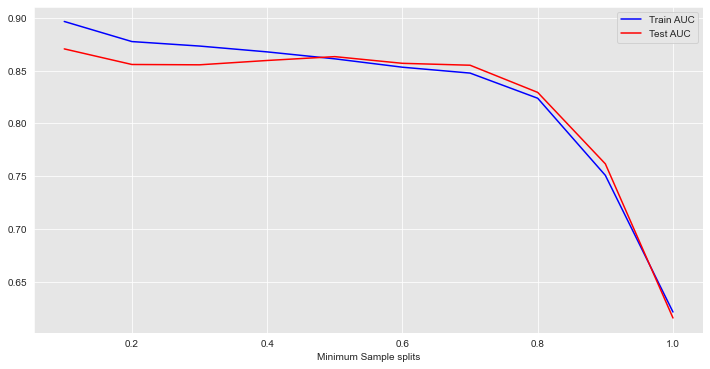

In [49]:
# Min_samples_split - Identifying the optimal minimum samples split

min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split)
    dt.fit(X_train, y_train)
    y_hat_train_dt = dt.predict_proba(X_train)[:, 1]
    fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_train, y_hat_train_dt)
    roc_auc_dt = auc(fpr_dt, tpr_dt)
    
    # Add auc score to previous train results
    train_results.append(roc_auc_dt)
    y_hat_test_dt = dt.predict_proba(X_test)[:, 1]
    fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_hat_test_dt)
    roc_auc_dt = auc(fpr_dt, tpr_dt)
    
    # Add auc score to previous test results
    test_results.append(roc_auc_dt)

plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.xlabel('Minimum Sample splits')
plt.legend()
plt.show()

The optimal Minimum Sample Split is 0.1.  

Even though the AUC scores for the train and test data begin to converge around a minimum sample split of 0.4 and 0.5, the maximum AUC scores for the train and test data is maximized around 0.1.  

In addition, at an approximate minimum sample split of 0.1, there is less than a 0.05 different between the train AUC score and test AUC score.

### Minimum Sample Leafs

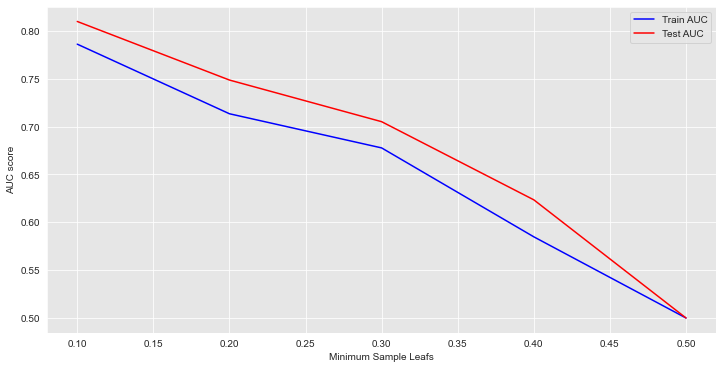

In [50]:
# Min_samples_leaf - Calculating optimal value for minimum sample leafs

min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf)
    dt.fit(X_train, y_train)
    y_hat_train_dt = dt.predict_proba(X_train)[:, 1]
    fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_train, y_hat_train_dt)
    roc_auc_dt = auc(fpr_dt, tpr_dt)
    train_results.append(roc_auc_dt)
    y_hat_test_dt = dt.predict_proba(X_test)[:, 1]
    fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_hat_test_dt)
    roc_auc_dt = auc(fpr_dt, tpr_dt)
    test_results.append(roc_auc_dt)
    
plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Minimum Sample Leafs')
plt.legend()
plt.show()

The optimal value for Minimum Sample Leafs is 0.1.

The train AUC score and test AUC score is maximized at approximately 0.1.  At a Minimum Sample Leaf of approximately 0.1, the different between the train AUC score and test AUC score is less than 0.05.

The train AUC score and test AUC score converge at a Minimum Sample Leaf of 0.5; however, the AUC scores for both train and test data are both 0.5.

### Maximum Features

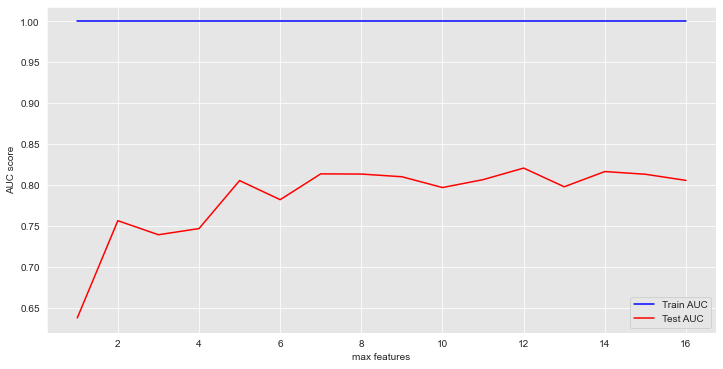

In [51]:
# Max_features - Identifying the best value for optimal maximum feature size

max_features = list(range(1, X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    dt = DecisionTreeClassifier(criterion='entropy', max_features=max_feature)
    dt.fit(X_train, y_train)
    y_hat_train = dt.predict_proba(X_train)[:, 1]
    fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_train, y_hat_train)
    roc_auc_dt = auc(fpr_dt, tpr_dt)
    train_results.append(roc_auc_dt)
    y_hat_test = dt.predict_proba(X_test)[:, 1]
    fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_hat_test)
    roc_auc_dt = auc(fpr_dt, tpr_dt)
    test_results.append(roc_auc_dt)

plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.legend()
plt.show()

Optimal maximum feature size is seen around 10.

The train AUC score constantly remains at 1.00.  However, the test AUC score - which is approximately 0.82 - peaks at a maximum feature size of 10.  

### Applying Updated Hyperparameter Values to Baseline Decision Tree Model

In [52]:
# Applying optimal values to the Decision Tree Classifier, and determining Area Under the Curve (AUC)

dt_1 = DecisionTreeClassifier(criterion='entropy',
                           max_depth=4,
                           min_samples_split=0.1,
                           min_samples_leaf=0.1,
                           max_features=10)

dt_1.fit(X_train, y_train)
y_hat_test_dt_1 = dt_1.predict(X_test)
fpr_dt_1, tpr_dt_1, thresholds_dt_1 = roc_curve(y_test, y_hat_test_dt_1)
roc_auc_dt_1 = auc(fpr_dt_1, tpr_dt_1)
roc_auc_dt_1

0.5

After I applied all of the optimal values to the Decision Tree Classifier, the calculated Area Under the Curve (AUC) - 0.5 - is worse than the Baseline Decision Tree Classifier (AUC), which is approximately 82.0%.

I will proceed with tuning the Baseline Decision Tree classifier by applying a maximum feature size of 10.

In [67]:
# Applying 'Max_Depth' optimal value to the Decision Tree Classifier, and determining Area Under the Curve (AUC)

dt_2 = DecisionTreeClassifier(criterion='entropy',
                           max_features=10)

dt_2.fit(X_train, y_train)
y_hat_test_dt_2 = dt_2.predict(X_test)
fpr_dt_2, tpr_dt_2, thresholds_dt_2 = roc_curve(y_test, y_hat_test_dt_2)
roc_auc_dt_2 = auc(fpr_dt_2, tpr_dt_2)
roc_auc_dt_2

0.8315486600846261

The AUC for the new Decision Tree classifier is approximately 83.2%.  This is slightly better than the Baseline Decision Tree Classifier.

For the new Decision Tree classifier, or Updated Decision Tree classifier, I will create and calculate the following:

- Decision Tree Visual Plot
- Decision Tree Model metrics - precision, recall, accuracy, and F1 score
- Confusion Matrix
- ROC Curve

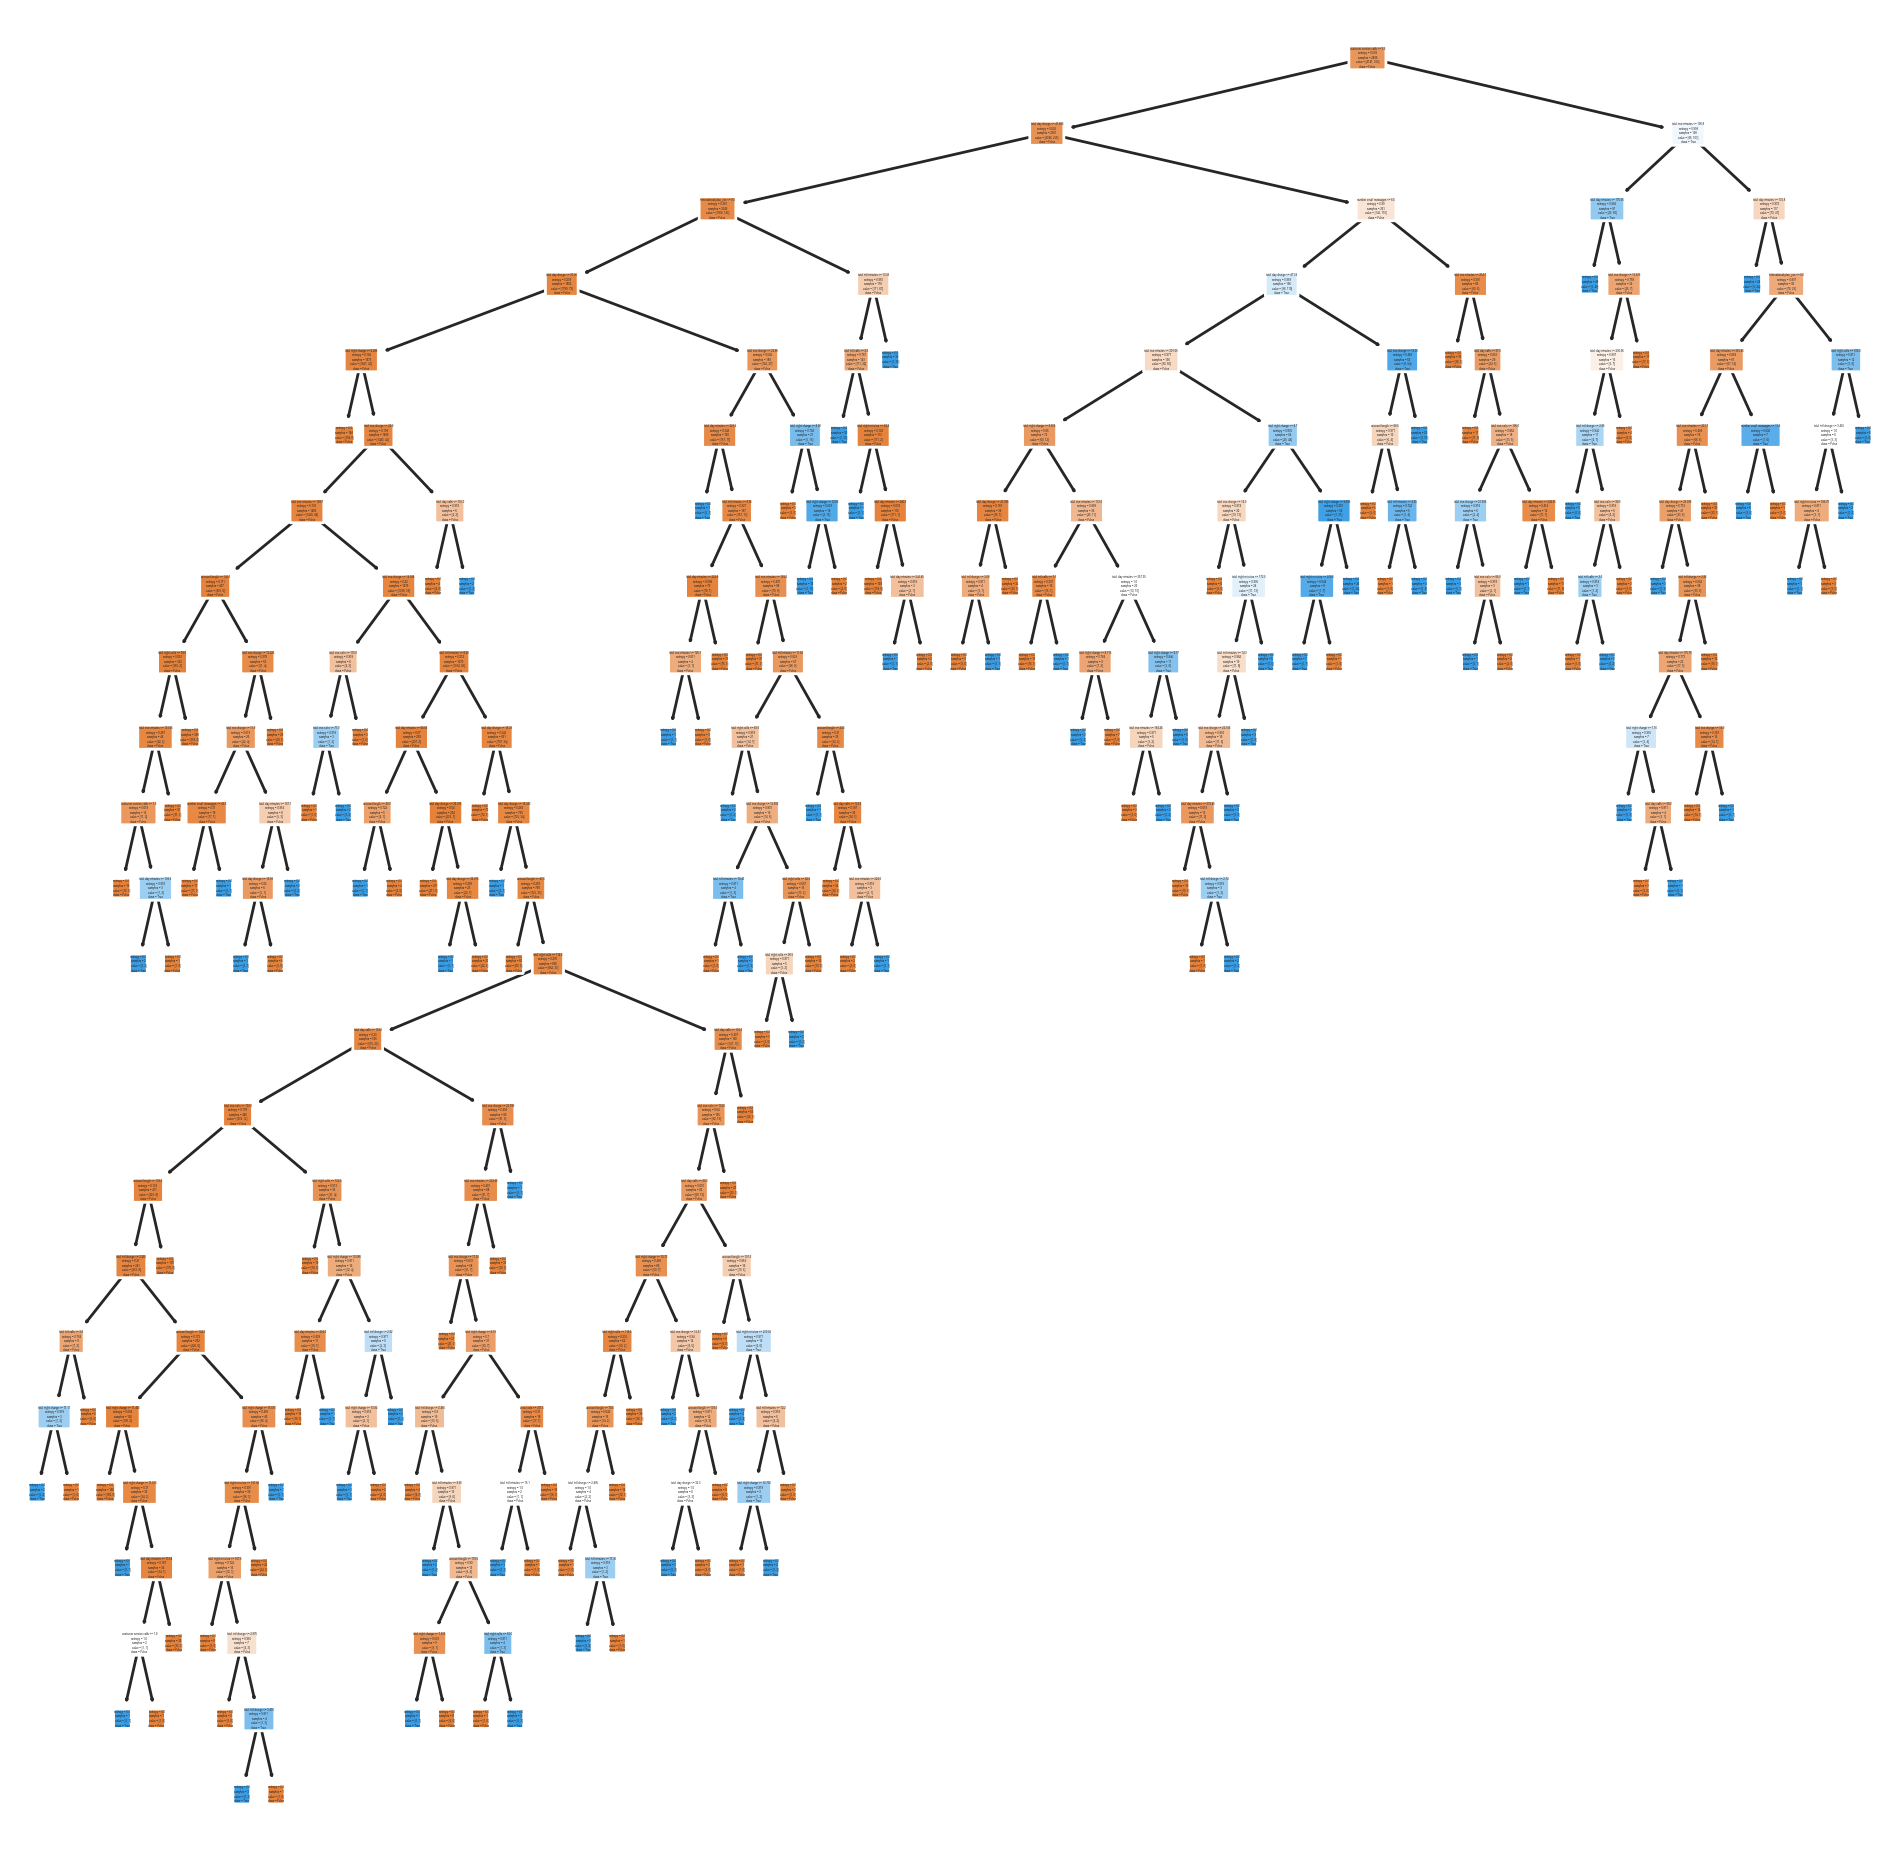

In [54]:
# Plot and Show decision tree for Updated Decision Tree Classifier

plt.figure(figsize=(12,12), dpi=200)
tree.plot_tree(dt_2, 
               feature_names=X.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
plt.show()

In [55]:
# Generating predictions with the training data via Updated Decision Tree Classifier

y_hat_train_dt_2 = dt_2.predict(X_train)

In [68]:
# Calculating Updated Decision Tree Model metrics - precision, recall, accuracy, and F1 score - for training and test data

print('Updated Decision Tree Training Precision: ', precision_score(y_train, y_hat_train_dt_2))
print('Updated Decision Tree Testing Precision: ', precision_score(y_test, y_hat_test_dt_2))
print('\n\n')
print('Updated Decision Tree Training Recall: ', recall_score(y_train, y_hat_train_dt_2))
print('Updated Decision Tree Testing Recall: ', recall_score(y_test, y_hat_test_dt_2))
print('\n\n')
print('Updated Decision Tree Training Accuracy: ', accuracy_score(y_train, y_hat_train_dt_2))
print('Updated Decision Tree Testing Accuracy: ', accuracy_score(y_test, y_hat_test_dt_2))
print('\n\n')
print('Updated Decision Tree Training F1-Score: ', f1_score(y_train, y_hat_train_dt_2))
print('Updated Decision Tree Testing F1-Score: ', f1_score(y_test, y_hat_test_dt_2))

Updated Decision Tree Training Precision:  1.0
Updated Decision Tree Testing Precision:  0.7521367521367521



Updated Decision Tree Training Recall:  1.0
Updated Decision Tree Testing Recall:  0.704



Updated Decision Tree Training Accuracy:  1.0
Updated Decision Tree Testing Accuracy:  0.920863309352518



Updated Decision Tree Training F1-Score:  1.0
Updated Decision Tree Testing F1-Score:  0.7272727272727272


Updated Decision Tree Confusion Matrix:
 [[674  35]
 [ 42  83]]


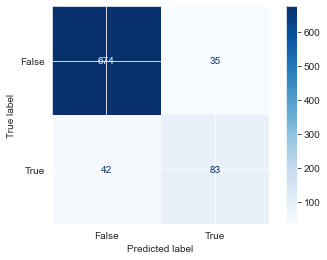

In [57]:
# Creating a confusion matrix for the Updated Decision Tree Model utilizing Test Data

cnf_matrix_test_dt_2 = confusion_matrix(y_test, y_hat_test_dt_2)

print('Updated Decision Tree Model Confusion Matrix:\n', cnf_matrix_test_dt_2)

disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_test_dt_2, display_labels=dt_2.fit(X_train, y_train).classes_)

disp.plot(cmap=plt.cm.Blues)

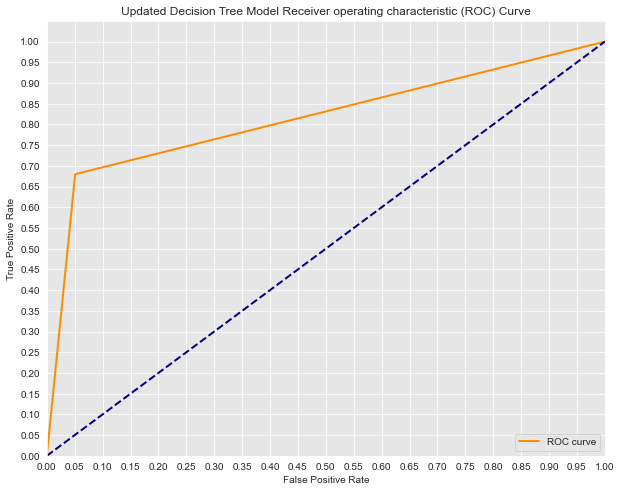

In [58]:
# Creating an ROC curve for Updated Decision Tree Model

y_score_dt_2 = dt_2.predict_proba(X_test)[:,1]

fpr_dt_2, tpr_dt_2, thresholds_dt_2 = roc_curve(y_test, y_score_dt_2)

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

#print('AUC: {}'.format(auc(fpr_dt_2, tpr_dt_2)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr_dt_2, tpr_dt_2, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Updated Decision Tree Model Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

I also want to understand which features are the most important in the Updated Decision Tree Classifier.  I will use the *feature importance* calculation from the sci-kit library.

In [59]:
# Understanding which features, or columns, are most important in the Updated Decision Tree Model

# Access feature importances

feature_importances = dt_2.feature_importances_ 


for feature, importance in zip(X_train.columns, feature_importances):

    print(feature, ": ", importance)


account length :  0.030553107692970566
area code :  0.0030579313678415617
number vmail messages :  0.03937637753964481
total day minutes :  0.20852369613598196
total day calls :  0.03727299656776454
total day charge :  0.0593138495650471
total eve minutes :  0.04738488753745721
total eve calls :  0.03997055539725685
total eve charge :  0.10138666624897334
total night minutes :  0.06477230411382381
total night calls :  0.03177814861674428
total night charge :  0.02340203182378719
total intl minutes :  0.021016240141019448
total intl calls :  0.0488836509417091
total intl charge :  0.0594942050492326
customer service calls :  0.09318627521126636
international plan_yes :  0.0906270760494793


<BarContainer object of 17 artists>

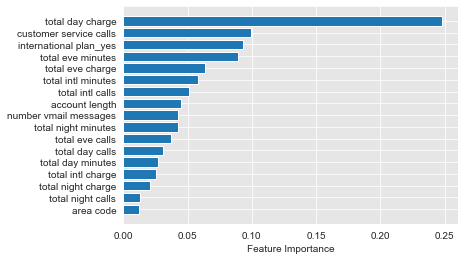

In [72]:
# Displaying which features, or columns, are most important in the Updated Decision Tree Model via Bar Graph

sort = dt_2.feature_importances_.argsort()

plt.xlabel("Feature Importance")

plt.barh(X_train.columns[sort], dt_2.feature_importances_[sort])


### Tuning the Baseline Decision Tree Model  | Conclusion

I have completed my efforts to tune the Baseline Decision Tree Model.  Baseline Decision Tree Model evaluation metrics are below.

**Baseline Decision Tree Model**

When the baseline model utilizes the training data, the evaluation metrics are the following:

- Precision: 100.0%
- Recall: 100.0%
- Accuracy: 100.0%
- F1 Score: 100.0%

When the baseline model utilizes the test data, the evaluation metrics are the following:

- Precision: 71.3%
- Recall: 69.6%
- Accuracy: 91.2%
- F1 Score: 70.4%

**Updated Decision Tree Model**

When the baseline model utilizes the training data, the evaluation metrics are the following:

- Precision: 100.0%
- Recall: 100.0%
- Accuracy: 100.0%
- F1 Score: 100.0%

When the baseline model utilizes the test data, the evaluation metrics are the following:

- Precision: 75.2%
- Recall: 70.4%
- Accuracy: 92.1%
- F1 Score: 72.7%

Both decision tree models have overfitting.  However, the Updated Decision Tree Model has less overfitting due to the slightly overall improvements in the test data evaluation metrics.

Furthermore, the Updated Decision Tree Model AUC score is slightly better than the Baseline Decision Tree Model AUC score.  The Updated Decision Tree Model AUC score is approximately 83.2%.  The Baseline Decision Tree Model AUC score is approximately 82.0%.  

The Updated Decision Tree Model is better than the Baseline Decision Tree Model due to the Updated Decision Tree Model's slight improvements in the evaluation metrics and AUC score.

# Overall Conclusion and Recommendations

## Overall Conclusion and Recommendations

**Baseline Logistic Regression Model**

The Baseline Logistic Regression Model performed the best in comparison to the other Logistic Regression models I constructed.  Evaluation metrics are the following:

*Training Data Evaluation Metrics*

- Precision: 56.5%
- Recall: 20.7%
- Accuracy: 86.4%
- F1 Score: 30.3%

*Test Data Evaluation Metrics*

- Precision: 56.1%
- Recall: 18.4%
- Accuracy: 85.6%
- F1 Score: 27.7%

**Updated Decision Tree Model**

The Updated Decision Tree Model performed better in comparison to the Baseline Decision Tree Model.  Evaluation metrics are the following:

*Training Data Evaluation Metrics*

- Precision: 100.0%
- Recall: 100.0%
- Accuracy: 100.0%
- F1 Score: 100.0%

Test Data Evaluation Metrics*

- Precision: 75.2%
- Recall: 70.4%
- Accuracy: 92.1%
- F1 Score: 72.7%

The Updated Decision Tree Model has overfitting due to the discrepancies between the following:

1. Training Data Precision and Test Data Precision
2. Training Data Recall and Test Data Recall
3. Training Data F1 Score and Test Data F1 Score.

However, the Updated Decision Tree Model has a higher accuracy than the Baseline Logistic Regression Model.  Furthermore, the Updated Decision Tree Model provides insight regarding which customer characteristics are important for predicting customer churn.

I will proceed with presenting the Updated Decision Tree Model to the client, SyriaTel.

## Next Steps

Next steps are the following:

**1. Present Updated Decision Tree Model and Model Metrics**

I will present the Updated Decision Tree Model along with the Evaluation Metrics - Precision, Recall, Accuracy, and F1 score - to the client, SyriaTel to provide a progress update.  More important, I want to acquire a deeper understanding of client requirements.

**2. Further Understand Most Important Model Features**

I understand which features are important in regards to predicting customer churn.  However, I will need to acquire a better understanding of how the features are related to customer churn.

For example, *customer service calls* is the second most important feature within the Updated Decision Tree Model.  However, I have to ask myself the following question: Is customer churn associated with an increase in customer service calls.  My intuition would make the assumption that an increase in customer service calls is associated with customer churn.  The customer may be frustrated with the telecom service.  Or the customer may not be aware of SyriaTel's whole suite of telephone services.

However, I will need to analyze my aforementioned intuition.

**3. Incorporate Feedback and New Information into Decision Tree Model**

Based on the feedback and insight from Steps 1 and 2, I will tune the Updated Decision Tree Model even further.